In [1]:
%matplotlib notebook
#all imports
import numpy as np
from sklearn import datasets # for creating artifical datasets
import matplotlib.pyplot as plt

# Linear Regression 

implementation of ordinary linear regression in python with reference and quick explanations


[n] means: Watch in "attachment" cell for an expanded explanation 

In [42]:
X, y= datasets.make_regression(n_features=1,noise=4) # generates new dataset
thetas = np.array(np.random.rand(1,X.shape[1]+1)[0,:]) # generates new start thetas

## Cost function

Cell below calculates sum square error between actual points and function. 
Formula:
    $$J(\theta) = \frac{1}{2}\sum_{i=1}^n(y^{(i)} - f(x^{(i)}))^2$$
whereas
    $$f(x) = \theta_0 + \theta_1X_1 ...\theta_kX_k $$

- - - 
You can read more about in these books: 
    1. Sarkar D., Bali R., Sharma T. - Practical Machine Learning with Python (page №300)
    2. S.Raschka - Python Machine Learning (page №467)
    

In [3]:
def cost_function(X,y,thetas):
    cost = np.sum( # np sum counts sum of all elements in an array or in a matrix
        (y-func_l(X,thetas))**2
    )/2
    return cost
    #returns a single number

## Gradient descent
Function below minimizes cost function with gradient descent. Formula:
$$\theta_n = \theta_n + \alpha\cdot\frac{\text{d}}{\text{d}\theta_n}J$$
and that's equal to
$$\theta_n = \theta_n -\alpha\cdot\sum_{i=0}^n(y^{(i)}-f(x^{(i)}))x_n^{(i)}$$
  
  
>If you don't understand what is $$\frac{\text{d}}{\text{d}\theta_n}J$$
I would reccomned you to visit [this site](https://www.khanacademy.org/math/differential-calculus). By reaching the topic "Product, quotient, & chain rules" you should get enough knowledge to understand the formula and what it's doing.
  
  
  - - - 
You can read more in these books:
    1. Sarkar D., Bali R., Sharma T. - Practical Machine Learning with Python (page №263)
    2. S.Raschka - Python Machine Learning (page №89)


In [11]:
def gradient_descent(X,y,thetas,alpha,num_of_iterations): 
    Xn = np.insert(X,0,1,axis=1) # inserts x0 parameter [1]
    clr=0
    for itera in range(0,num_of_iterations):
        new_theta = [] # thetas need to be updated simultaneously
        for idx, theta in enumerate(thetas): # for every theta
            calc=np.sum((y-func_l(Xn,thetas))*Xn[:,idx]) # that's calculates derivative of cost function prior to theta
            new_theta.append(theta+alpha*calc) 
            
        # only for visualization
        # ------------------------
        if itera%(num_of_iterations/6)==0: 
            clr+=1
            plt.plot(X,
                     func_l(X,thetas),
                     color=[1.0-clr/10,0+clr/10,0])
        # ------------------------
        thetas = np.array(new_theta)
    return thetas

## Linear function

Equation for line:   
$$y = kx +b$$ 
Where K - slope of the line that describes both the direction and the steepness of the line. 
Equation for line could have multiple coefficients (k)  

$$y = \theta_0[2]+\theta_1X_0+...+\theta_nX_n$$

So by shanging thetas we change slope of the line  
Theta 0 will be b (bias) (sets graph upper or downer)

In [36]:
def func_l(X,thetas):
    func = np.sum(np.multiply(X,thetas[:]),axis=1)#
    return func

## Start function
Function below plots points on graph and start other function

In [37]:
def start(X, y, thetas, alpha, iteration_count):
    plt.figure(figsize = [10,10])
    plt.scatter(X, y)
    plt.plot(X, func_l(X,thetas), label="start linear", color="red")
    print("before training {}".format(cost_function(X, y, thetas)))
    new_tets = gradient_descent(X, y, thetas, alpha, iteration_count)
    print("after training {}".format(cost_function(X, y, new_tets)))
    plt.plot(X, func_l(X, new_tets), label="after training", color="green")
    plt.legend()
    plt.show()

## Settings section
In cell below you can change parameters and watch how do they affects gradient descent

In [60]:
parameters = { 
    "alpha": 0.0001, #default 0.0001
    "iteration_count":600, #default 600 (if you want to change - make sure that the number can be divided by 6)
}

## Start section
A function in cell below starts the algorithm

<IPython.core.display.Javascript object>


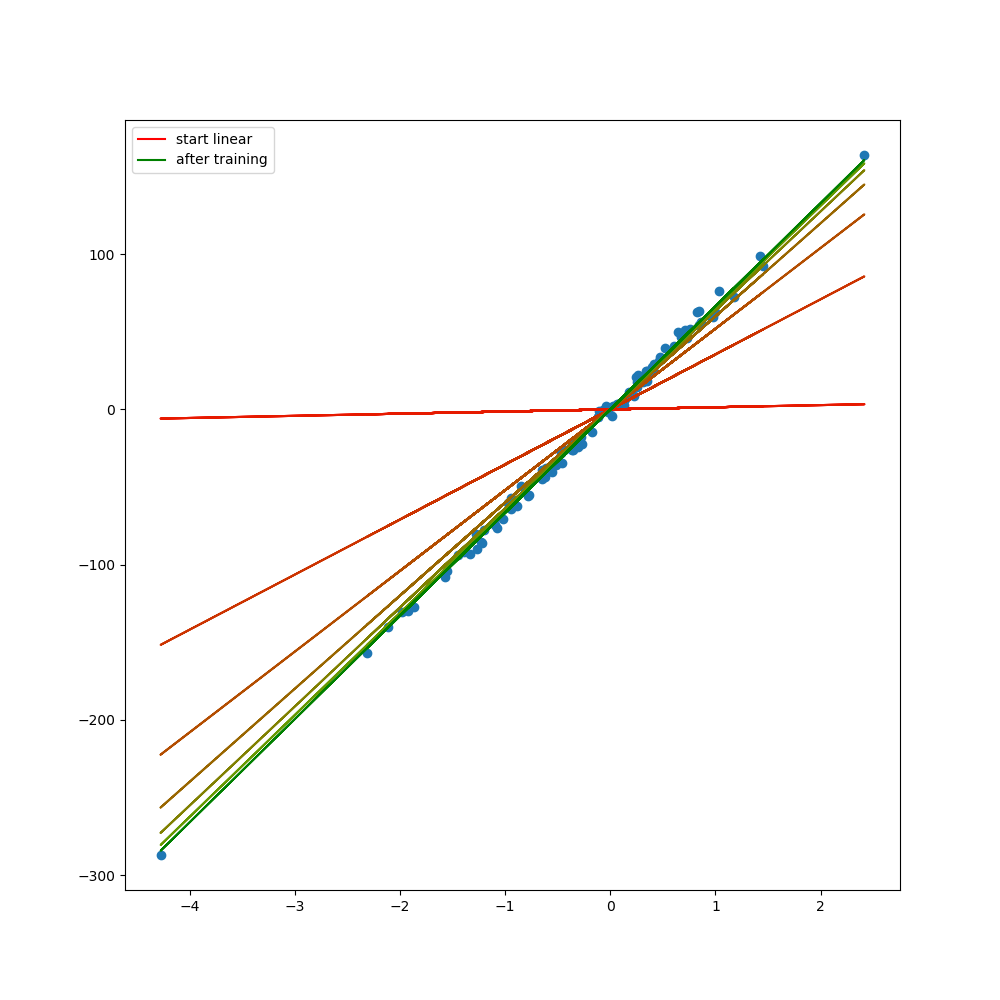

before training 209092.58926007568
after training 633.053763770182


In [61]:
start(X,y,thetas, **parameters)

## Attachment
[1], [2] - We add in matrix of X'es new vector with ones and placing it on the first place. We do that for:  
$$\theta_0\cdot X_0 (=1)=\theta_o=b $$
That's for us to have vectorized soluction


# TO DO list

- Lasso linear regression
- Ridge linear regression
- Min/Max scaler